#### **Bu notebook'un amacı:**
1. Her marketing channel'ın detaylı performans analizi
2. Platform ve tool effectiveness comparison
3. Customer segmentation by channel
4. ROI optimization recommendations
5. Business actionable insights

Analysis Framework:
- Descriptive: Ne oluyor? (metrics, distributions)
- Diagnostic: Neden oluyor? (correlations, patterns)
- Prescriptive: Ne yapmalı? (recommendations)

In [1]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization settings
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [3]:
df = pd.read_csv('../data/marketing_analytics_featured.csv')

print("📊 CHANNEL ANALYTICS - DATA OVERVIEW")
print("="*70)
print(f"Dataset Shape: {df.shape}")
print(f"Date Range: {'N/A' if 'Date' not in df.columns else 'Available'}")
print(f"\nChannels: {df['CampaignChannel'].nunique()}")
print(f"Platforms: {df['AdvertisingPlatform'].nunique()}")
print(f"Tools: {df['AdvertisingTool'].nunique()}")

📊 CHANNEL ANALYTICS - DATA OVERVIEW
Dataset Shape: (48000, 37)
Date Range: N/A

Channels: 7
Platforms: 7
Tools: 6


#### **CHANNEL OVERVIEW - KEY METRICS**
1. Volume Metrics
   - Total customers, Total spend

2. Efficiency Metrics (ne kadar verimli?)
   - CTR, Conversion Rate, CPA

3. Value Metrics (ne kadar değerli?)
   - Average income, Customer value score

In [4]:
# Aggregate by channel
channel_metrics = df.groupby('CampaignChannel').agg({
    'CustomerID': 'count',                    # Volume
    'AdSpend': ['sum', 'mean'],               # Cost
    'ClickThroughRate': 'mean',               # Efficiency
    'ConversionRate': 'mean',                 # Efficiency
    'Conversion': ['sum', 'mean'],            # Results
    'Income': 'mean',                         # Customer value
    'LoyaltyPoints': 'mean',                  # Customer value
    'WebsiteVisits': 'mean',                  # Engagement
    'TimeOnSite': 'mean'                      # Engagement
}).round(4)

In [5]:
# Flatten column names
channel_metrics.columns = [
    'Total_Customers', 'Total_AdSpend', 'Avg_AdSpend',
    'Avg_CTR', 'Avg_ConversionRate', 'Total_Conversions', 'Conversion_Rate',
    'Avg_Income', 'Avg_LoyaltyPoints', 'Avg_WebsiteVisits', 'Avg_TimeOnSite'
]

# Calculate derived metrics
channel_metrics['CPA'] = channel_metrics['Total_AdSpend'] / (channel_metrics['Total_Conversions'] + 1)
channel_metrics['ROI_Proxy'] = (channel_metrics['Avg_ConversionRate'] * channel_metrics['Avg_Income']) / (channel_metrics['Avg_AdSpend'] + 1)

# Sort by conversion rate
channel_metrics = channel_metrics.sort_values('Conversion_Rate', ascending=False)

print("\n📋 CHANNEL METRICS TABLE:")



📋 CHANNEL METRICS TABLE:
                 Total_Customers  Total_AdSpend  Avg_AdSpend  Avg_CTR  Avg_ConversionRate  Total_Conversions  Conversion_Rate  Avg_Income  Avg_LoyaltyPoints  Avg_WebsiteVisits  Avg_TimeOnSite            CPA  ROI_Proxy
CampaignChannel                                                                                                                                                                                                          
Referral                    3831     8511926.44    2221.8550   0.0791              0.0295                 62           0.0162  40432.3164          1206.8919             7.4735          3.4816  135109.943492   0.536586
Email                      11854    25775696.55    2174.4303   0.0791              0.0309                167           0.0141  40311.6126          1262.9193             7.4095          3.4807  153426.765179   0.572590
Display                     2422     5454120.17    2251.9076   0.0780              0.0313             

In [6]:
print(channel_metrics)

                 Total_Customers  Total_AdSpend  Avg_AdSpend  Avg_CTR  \
CampaignChannel                                                         
Referral                    3831     8511926.44    2221.8550   0.0791   
Email                      11854    25775696.55    2174.4303   0.0791   
Display                     2422     5454120.17    2251.9076   0.0780   
PPC                         8632    18914264.69    2191.1799   0.0790   
Social Media               14481    32126319.85    2218.5153   0.0786   
Affiliate                    989     2182493.86    2206.7683   0.0817   
SEO                         5791    12791814.24    2208.9128   0.0772   

                 Avg_ConversionRate  Total_Conversions  Conversion_Rate  \
CampaignChannel                                                           
Referral                     0.0295                 62           0.0162   
Email                        0.0309                167           0.0141   
Display                      0.0313       


📈 CHANNEL PERFORMANCE VISUALIZATIONS


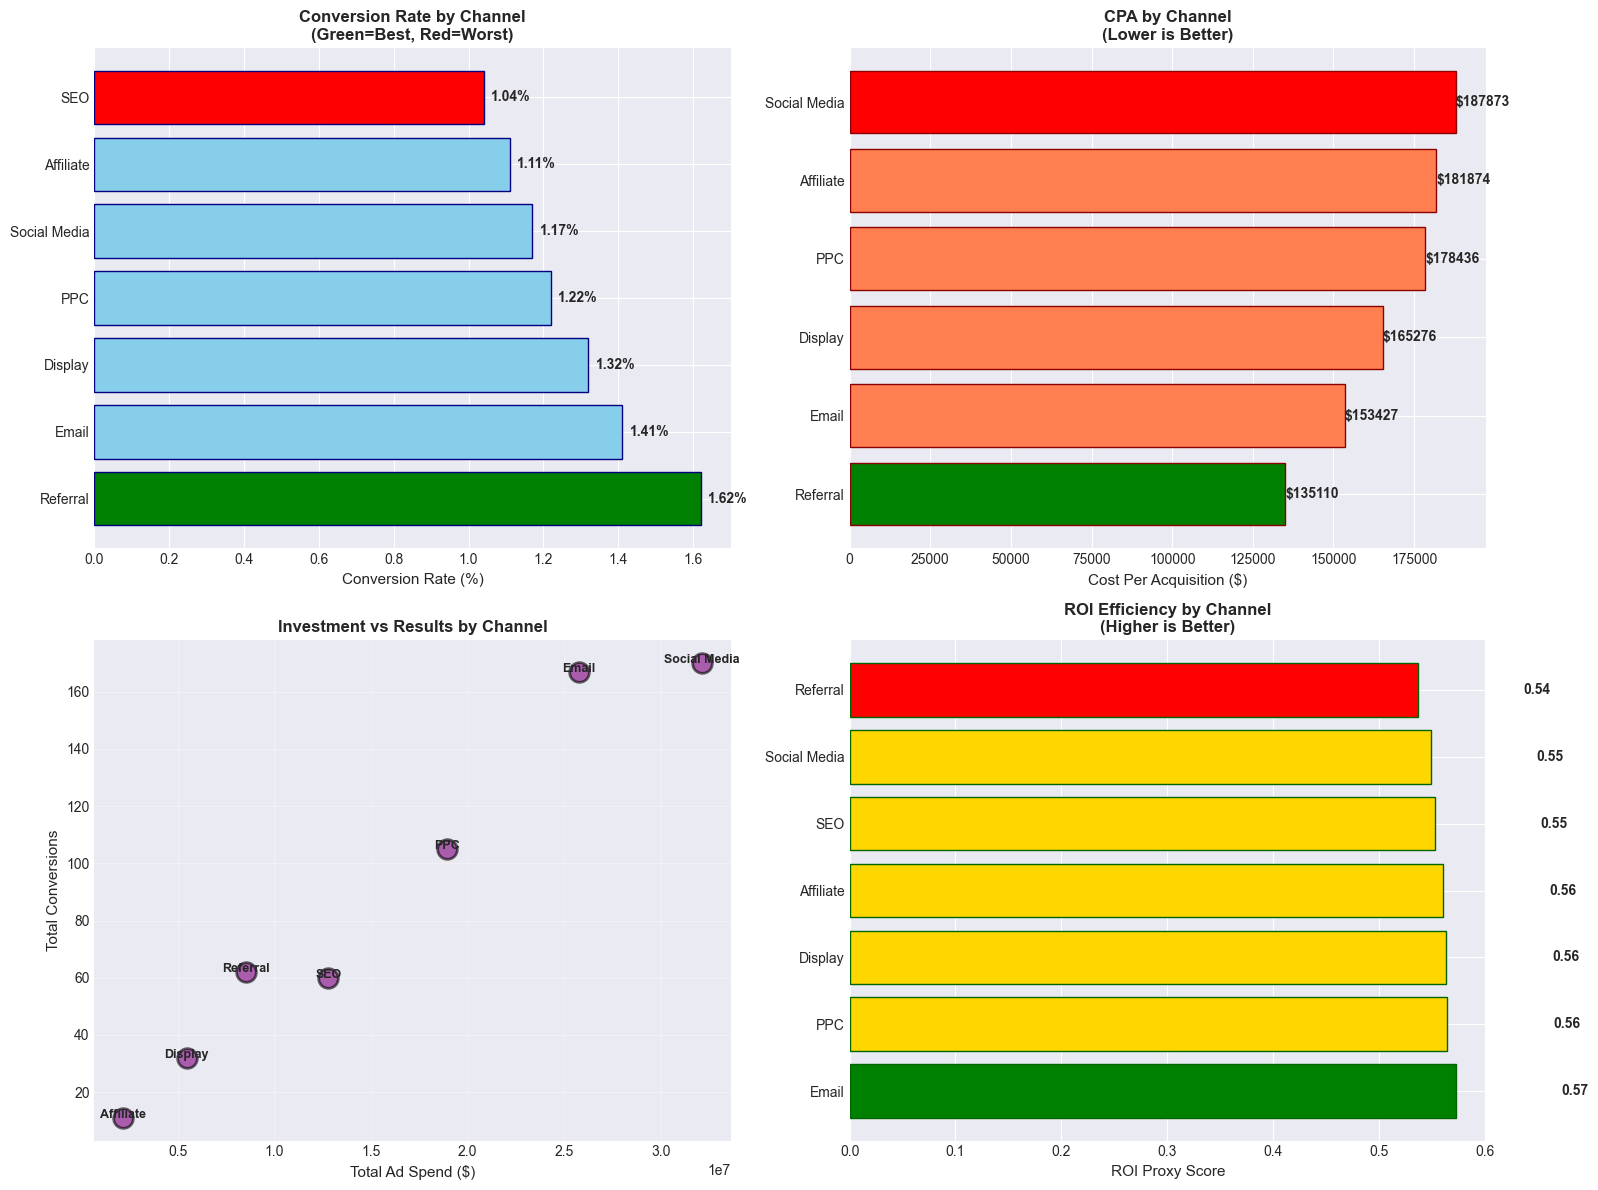


✅ Visualizations saved to: ../reports/channel_performance_overview.png


In [9]:
print("\n" + "="*70)
print("📈 CHANNEL PERFORMANCE VISUALIZATIONS")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Conversion Rate by Channel
ax1 = axes[0, 0]
conv_rates = channel_metrics['Conversion_Rate'].sort_values(ascending=False) * 100
colors = ['green' if i == 0 else 'red' if i == len(conv_rates)-1 else 'skyblue'
          for i in range(len(conv_rates))]
bars1 = ax1.barh(conv_rates.index, conv_rates.values, color=colors, edgecolor='navy')
ax1.set_xlabel('Conversion Rate (%)', fontsize=11)
ax1.set_title('Conversion Rate by Channel\n(Green=Best, Red=Worst)', fontsize=12, fontweight='bold')
for i, (idx, val) in enumerate(conv_rates.items()):
    ax1.text(val + 0.02, i, f'{val:.2f}%', va='center', fontsize=10, fontweight='bold')


# 2. Cost Per Acquisition (CPA)
ax2 = axes[0, 1]
cpa_data = channel_metrics['CPA'].sort_values()
cpa_data = cpa_data[cpa_data < cpa_data.quantile(0.95)]  # Remove extreme outliers
colors2 = ['green' if i == 0 else 'red' if i == len(cpa_data)-1 else 'coral'
           for i in range(len(cpa_data))]
bars2 = ax2.barh(cpa_data.index, cpa_data.values, color=colors2, edgecolor='darkred')
ax2.set_xlabel('Cost Per Acquisition ($)', fontsize=11)
ax2.set_title('CPA by Channel\n(Lower is Better)', fontsize=12, fontweight='bold')
for i, (idx, val) in enumerate(cpa_data.items()):
    ax2.text(val + 50, i, f'${val:.0f}', va='center', fontsize=10, fontweight='bold')


# 3. Total Ad Spend vs Total Conversions
ax3 = axes[1, 0]
scatter_data = channel_metrics[['Total_AdSpend', 'Total_Conversions']].copy()
ax3.scatter(scatter_data['Total_AdSpend'], scatter_data['Total_Conversions'],
            s=200, alpha=0.6, c='purple', edgecolors='black', linewidth=2)
for idx, row in scatter_data.iterrows():
    ax3.annotate(idx, (row['Total_AdSpend'], row['Total_Conversions']),
                 fontsize=9, fontweight='bold', ha='center')
ax3.set_xlabel('Total Ad Spend ($)', fontsize=11)
ax3.set_ylabel('Total Conversions', fontsize=11)
ax3.set_title('Investment vs Results by Channel', fontsize=12, fontweight='bold')
ax3.grid(alpha=0.3)

# 4. ROI Proxy by Channel
ax4 = axes[1, 1]
roi_data = channel_metrics['ROI_Proxy'].sort_values(ascending=False)
colors4 = ['green' if i == 0 else 'red' if i == len(roi_data)-1 else 'gold'
           for i in range(len(roi_data))]
bars4 = ax4.barh(roi_data.index, roi_data.values, color=colors4, edgecolor='darkgreen')
ax4.set_xlabel('ROI Proxy Score', fontsize=11)
ax4.set_title('ROI Efficiency by Channel\n(Higher is Better)', fontsize=12, fontweight='bold')
for i, (idx, val) in enumerate(roi_data.items()):
    ax4.text(val + 0.1, i, f'{val:.2f}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/channel_performance_overview.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Visualizations saved to: ../reports/channel_performance_overview.png")



#### **PLATFORM ANALYSIS (Google vs Facebook vs Instagram vs LinkedIn)**